## 2. Simple beam, concentrated load at center 
Common Formulas For Beams  
        (Airframe Stress Amalysis and Sizing, Niu 2011)

In [4]:
from sympy import *
import numpy as np
from IPython.display import display
# to print with mathjax on jupyter notebook
init_printing()

#シンボル定義
p, x, L, E, I = symbols('P x L E I')
r_a, r_c = symbols('R_A R_C')
v_ab, v_bc = symbols('V_{A-B} V_{B-C}')
m_ab, m_bc = symbols('M_{A-B} M_{A-C}')
max_m_b = symbols('Max.M_B')
max_y_a = symbols('Max.y_A')
theta_a, theta_c = symbols('theta_A theta_C')
y_ab = symbols('y_{A-B}')

#式定義　[0]：左辺, [1]：右辺
expr = {r_a:p/2,
        r_c:p/2,
        v_ab: p/2,
        v_bc: -p/2,
        m_ab: -p * x / 2,
        m_bc: p*(L-x) / 2,
        max_m_b: p * L/4,
        y_ab: -p/(48*E*I) * (3 * L **2* x - 4* x **3),
        max_y_a: -p* L ** 3/(48*E*I),
        theta_a: -p* L ** 2/(16*E*I),
        theta_c: p* L ** 2/(16*E*I)}

<img src="./fig/SignConvention2.jpg",width="400",align="left">

- Loading and Support

<img src="./fig/NiuCommonFormulas02.jpg", width="300",align="left">

- Reactions and Shears

In [6]:
display(Eq(r_a,expr[r_a]))
display(Eq(r_c,expr[r_c]))

display(Eq(v_ab,expr[v_ab]))
display(Eq(v_bc,expr[v_bc]))

- Bending Moments

In [8]:
display(Eq(m_ab,expr[m_ab]))
display(Eq(m_bc,expr[m_bc]))
display(Eq(max_m_b,expr[max_m_b]))

- Deflections and Slopes

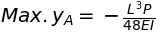

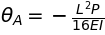

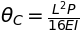

In [11]:
display(Eq(y_ab,expr[y_ab]))
display(Eq(max_y_a,expr[max_y_a]))
display(Eq(theta_a,expr[theta_a]))
display(Eq(theta_c,expr[theta_c]))

- Input Value

In [13]:
p_val= 10.
L_val= 1*1e3
E_val= 9* 1e2
I_val= 1e6

display(Eq(p,p_val))
display(Eq(L,L_val))
display(Eq(E,E_val))
display(Eq(I,I_val))

- Result

In [15]:
display(Eq(r_a,expr[r_a].subs([(p,p_val)])))
display(Eq(r_c,expr[r_c].subs([(p,p_val)])))
display(Eq(max_m_b,expr[max_m_b]
           .subs([(p,p_val),(L,L_val)])))
display(Eq(max_y_a,expr[max_y_a]
           .subs([(p,p_val),(L,L_val),(E,E_val),(I,I_val)])))
display(Eq(theta_a,expr[theta_a]
           .subs([(p,p_val),(L,L_val),(E,E_val),(I,I_val)])))
display(Eq(theta_c,expr[theta_c]
           .subs([(p,p_val),(L,L_val),(E,E_val),(I,I_val)])))

----

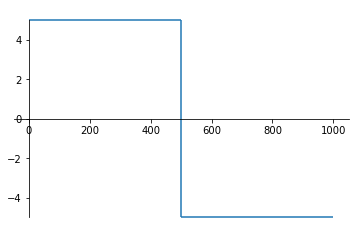

In [80]:
%matplotlib inline
from sympy import init_printing
from sympy import interpolate
from sympy.plotting import plot,plot_parametric

u,v = symbols('u v')

display(Eq(v_ab,expr[v_ab]))
display(Eq(v_bc,expr[v_bc]))

d1,d2,d3=0,L_val/2,L_val

f1 = expr[v_ab].subs([(p,p_val),(L,L_val),(E,E_val),(I,I_val)])
f3 = expr[v_bc].subs([(p,p_val),(L,L_val),(E,E_val),(I,I_val)])

plot_parametric((u,f1,(u,d1,d2)),
                (d2,v,(v,f1,f3)),
                (u,f3,(u,d2,d3)))

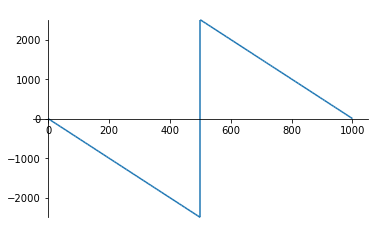

In [101]:
%matplotlib inline
from sympy import init_printing
from sympy import interpolate
from sympy.plotting import plot,plot_parametric

u,v = symbols('u v')

display(Eq(v_ab,expr[m_ab]))
display(Eq(v_bc,expr[m_bc]))

d1,d2,d3=0,L_val/2,L_val

f1 = expr[m_ab].subs([(p,p_val),(L,L_val),(E,E_val),(I,I_val)])
f3 = expr[m_bc].subs([(p,p_val),(L,L_val),(E,E_val),(I,I_val)])

plot_parametric((u,f1.subs(x,u),(u,d1,d2)),
                (d2,v,(v,f1.subs(x,d2),f3.subs(x,d2))),
                (u,f3.subs(x,u),(u,d2,d3)))

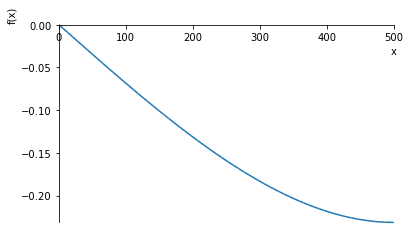

In [35]:
%matplotlib inline
from sympy import init_printing
from sympy.plotting import plot
display(Eq(y_ab,expr[y_ab]))
plot(expr[y_ab]
     .subs([(p,p_val),(L,L_val),(E,E_val),(I,I_val)])
     , (x, 0, L_val/2))